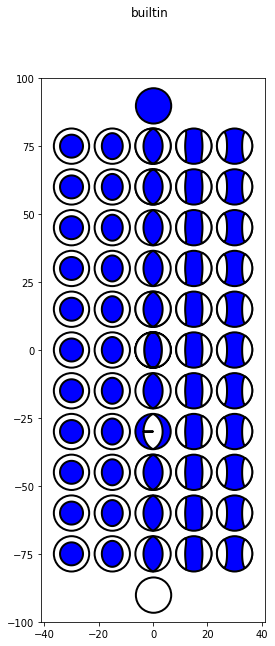

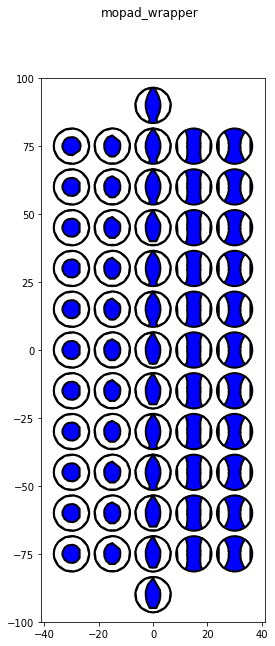

In [1]:
import requests
import io
import numpy as np
import matplotlib.pyplot as plt
from obspy.imaging.beachball import beach as bb1
from obspy.imaging.mopad_wrapper import beach as bb2
%matplotlib inline

url = ("https://raw.githubusercontent.com/carltape/compearth/master/"
       "momenttensor/plot/gmt/beachball_plots/"
       "beachballs_ipts1_iref1_lune_psmeca")
data = requests.get(url)
buf = io.BytesIO(data.content)
cols1 = [3, 4, 5, 6, 7, 8]
cols2 = [0, 1, 2]

mt_data = np.loadtxt(buf, usecols=cols1)
buf.seek(0)
xyz_data = np.loadtxt(buf, usecols=cols2)

fig1, ax1 = plt.subplots(figsize=(4, 10))
fig2, ax2 = plt.subplots(figsize=(4, 10))
for ax in (ax1, ax2):
    ax.axis("equal")
for mt, (x, y, depth) in zip(mt_data, xyz_data):
    for ax, bb in zip((ax1, ax2), (bb1, bb2)):
        coll = bb(mt, xy=(x, y), width=13, size=13)
        ax.add_collection(coll)
for ax in (ax1, ax2):
    ax.set_xlim(-40, 40)
    ax.set_ylim(-100, 100)
fig1.suptitle("builtin")
fig2.suptitle("mopad_wrapper")
plt.show()

# Notes on USE to NED
- Mrr = Mdd
- Mtt = Mnn
- Mpp = Mee
- Mrt = Mnd
- Mrp = -Med
- Mtp = -Mne

In [40]:
from pyrocko.plot import beachball
from pyrocko import moment_tensor as mtm
import numpy 
import matplotlib.pyplot as plt
%matplotlib inline

mt = np.array([[ 1.04 , -0.427, -0.61 ,  2.98 , -2.4  ,  0.426]])
#np.array(test_eq[['MRR', 'MTT', 'MPP', 'MRT', 'MPR', 'MTP']])[0]
#mt = np.array([5, 1, 5, 0, 0, 0])


In [27]:
# create earthquakes for visualization
from pyrocko import gf

thrust_ex = gf.DCSource(depth=0, strike=0., dip=15., rake=90)
norm_ex = gf.DCSource(depth=0, strike=0., dip=45., rake=-90)
ss_ex = gf.DCSource(depth=0, strike=90, dip=90., rake=170)


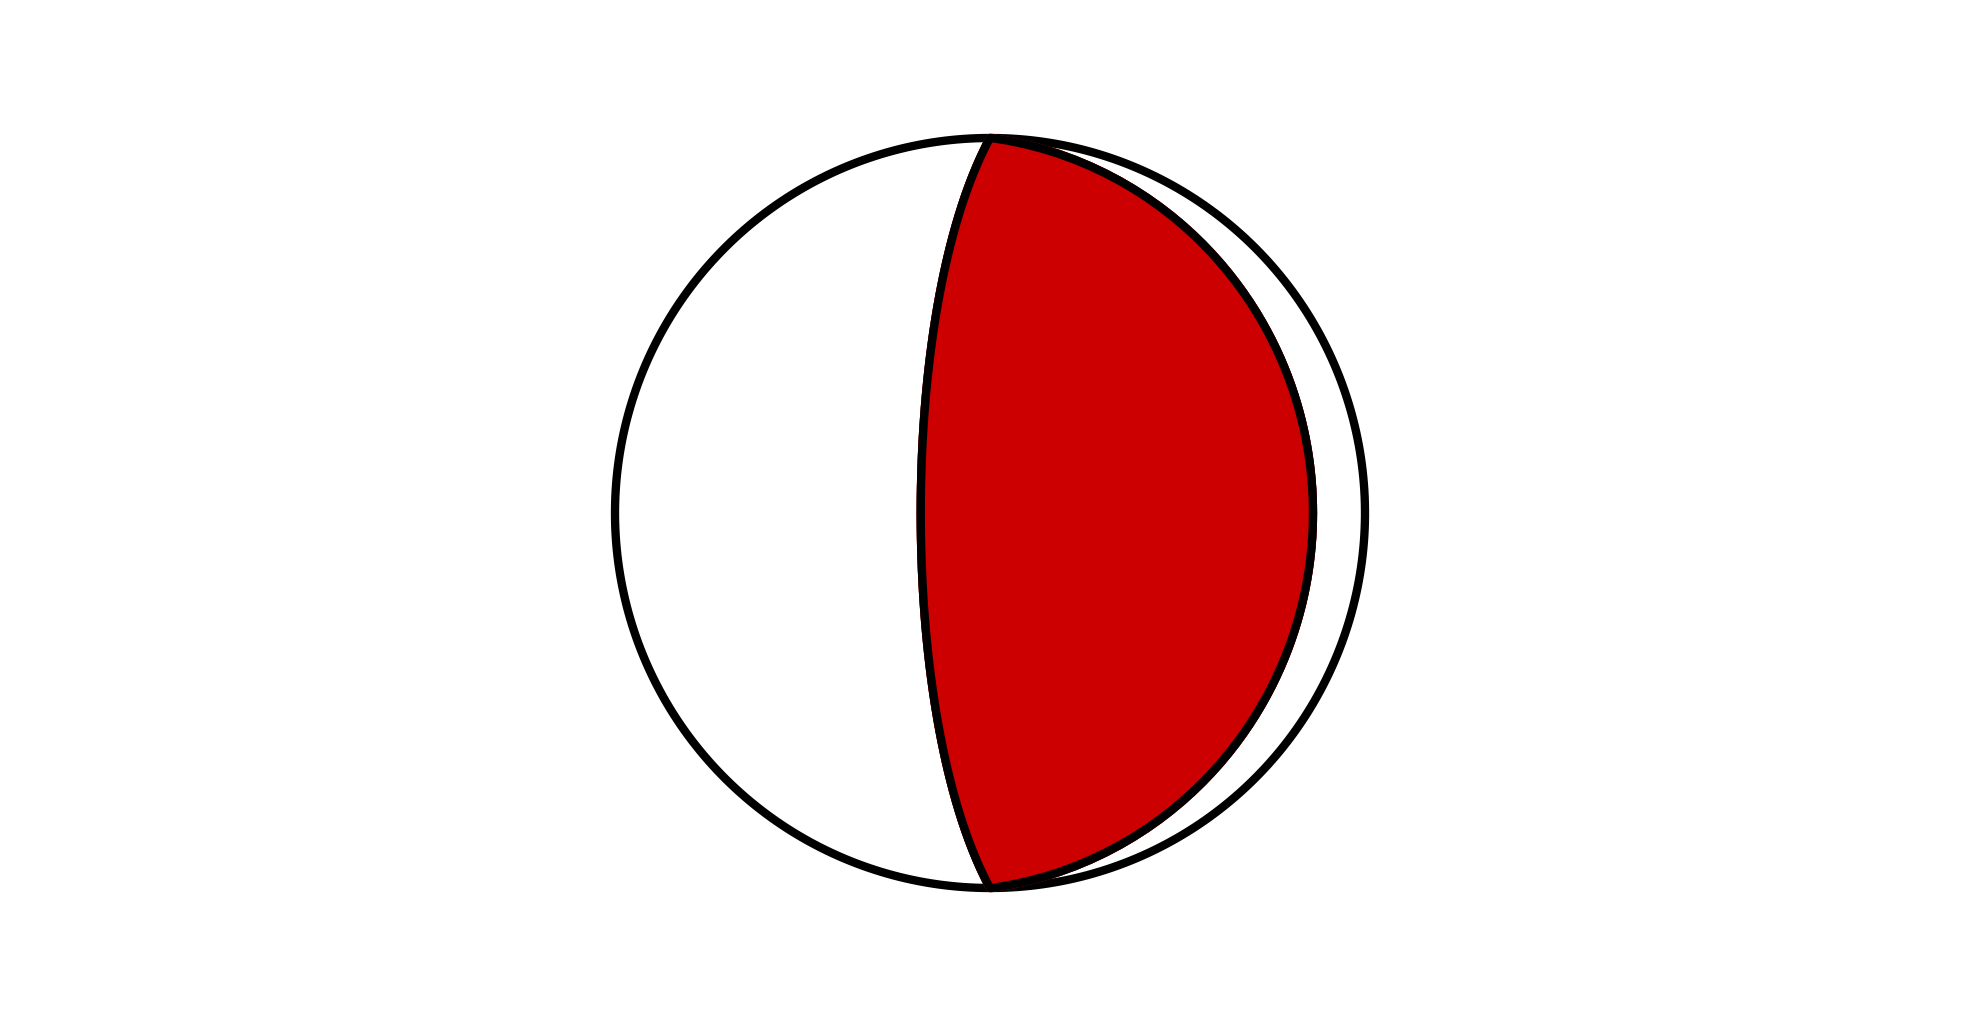

In [3]:
from matplotlib import pyplot as plt
from pyrocko import moment_tensor as pmt
from pyrocko import plot

# plot thrust

fig,ax = plt.subplots(figsize=(4., 2.), dpi = 600)

ax.set_ylim([-3, 3])
ax.set_xlim([-3, 3])
ax.set_axis_off()

plot.beachball.plot_beachball_mpl(
   thrust_ex.pyrocko_moment_tensor(),
    ax,
    beachball_type='full',
    size=90.,
    position=(0, 0),
    color_t=plot.mpl_color('scarletred2'),
    linewidth=1.0)

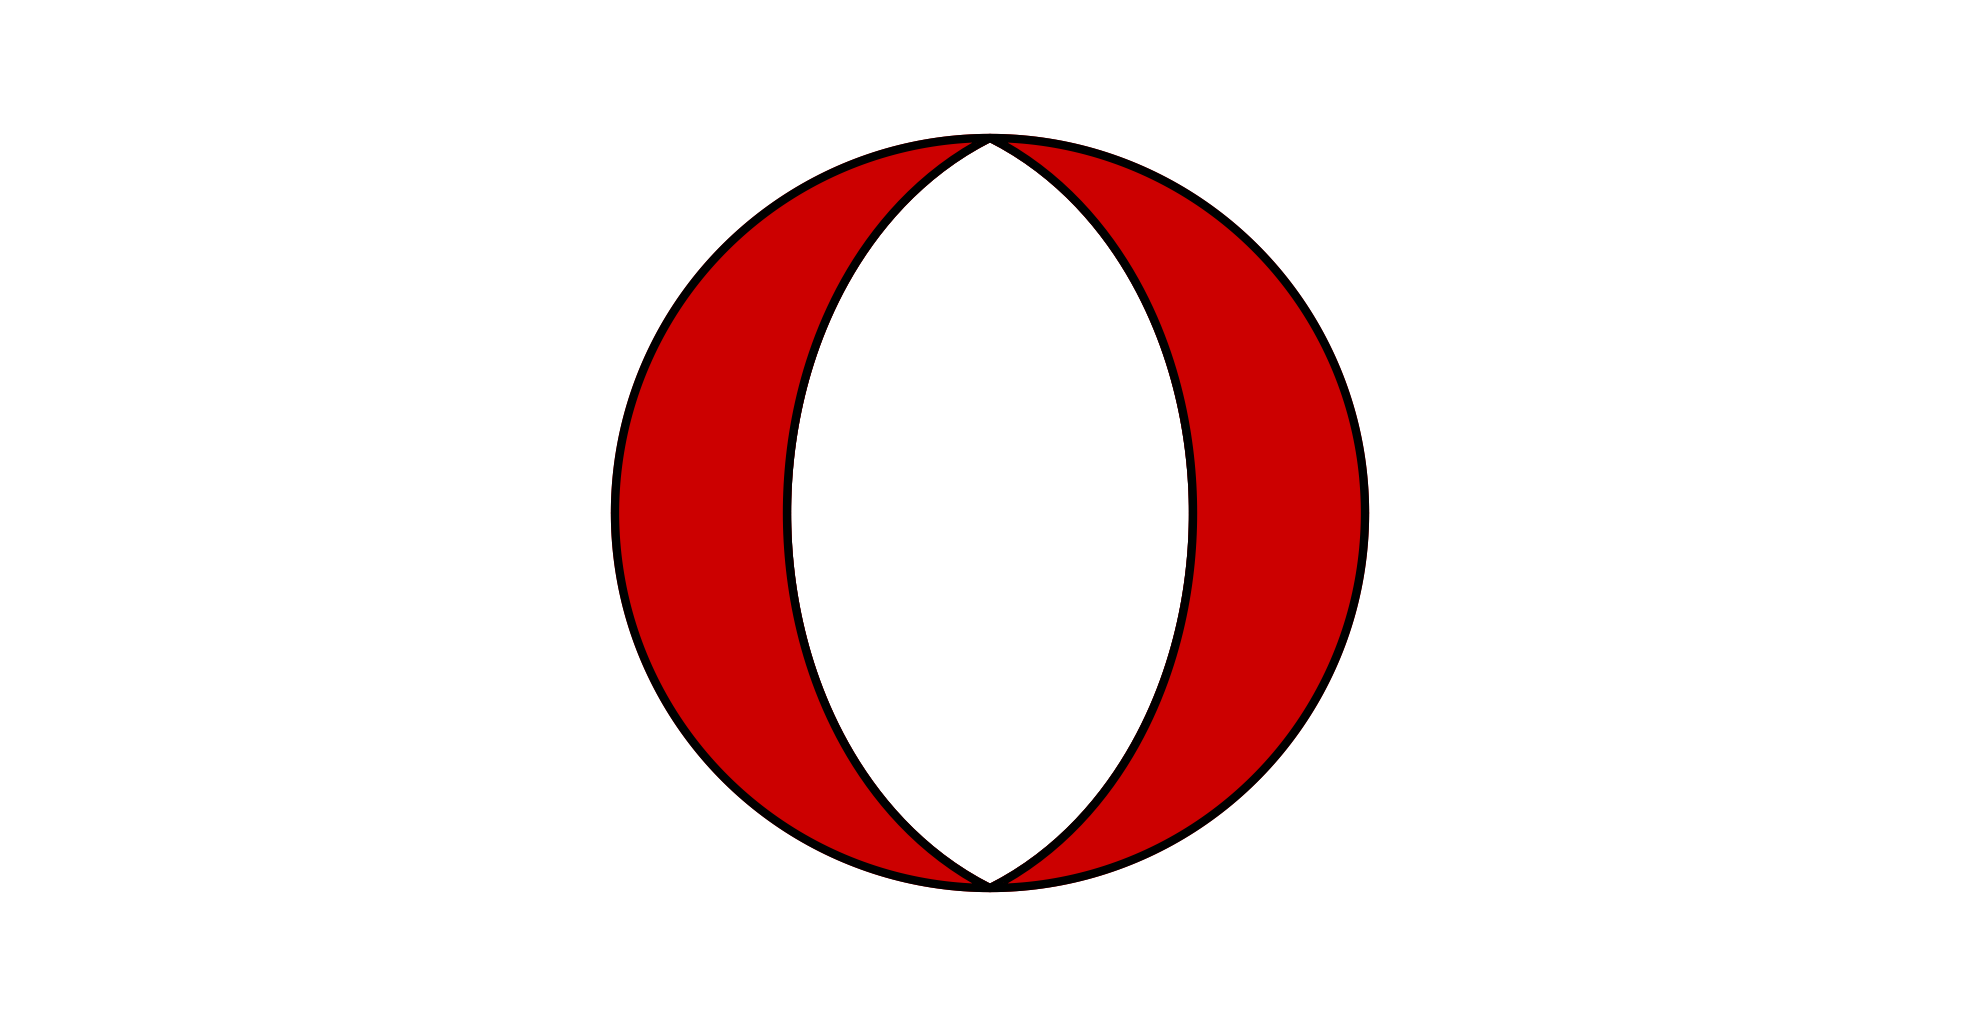

In [33]:
# normal

fig,ax = plt.subplots(figsize=(4., 2.), dpi = 600)

ax.set_ylim([-3, 3])
ax.set_xlim([-3, 3])
ax.set_axis_off()

plot.beachball.plot_beachball_mpl(
   norm_ex.pyrocko_moment_tensor(),
    ax,
    beachball_type='full',
    size=90.,
    position=(0, 0),
    color_t=plot.mpl_color('scarletred2'),
    linewidth=1.0)

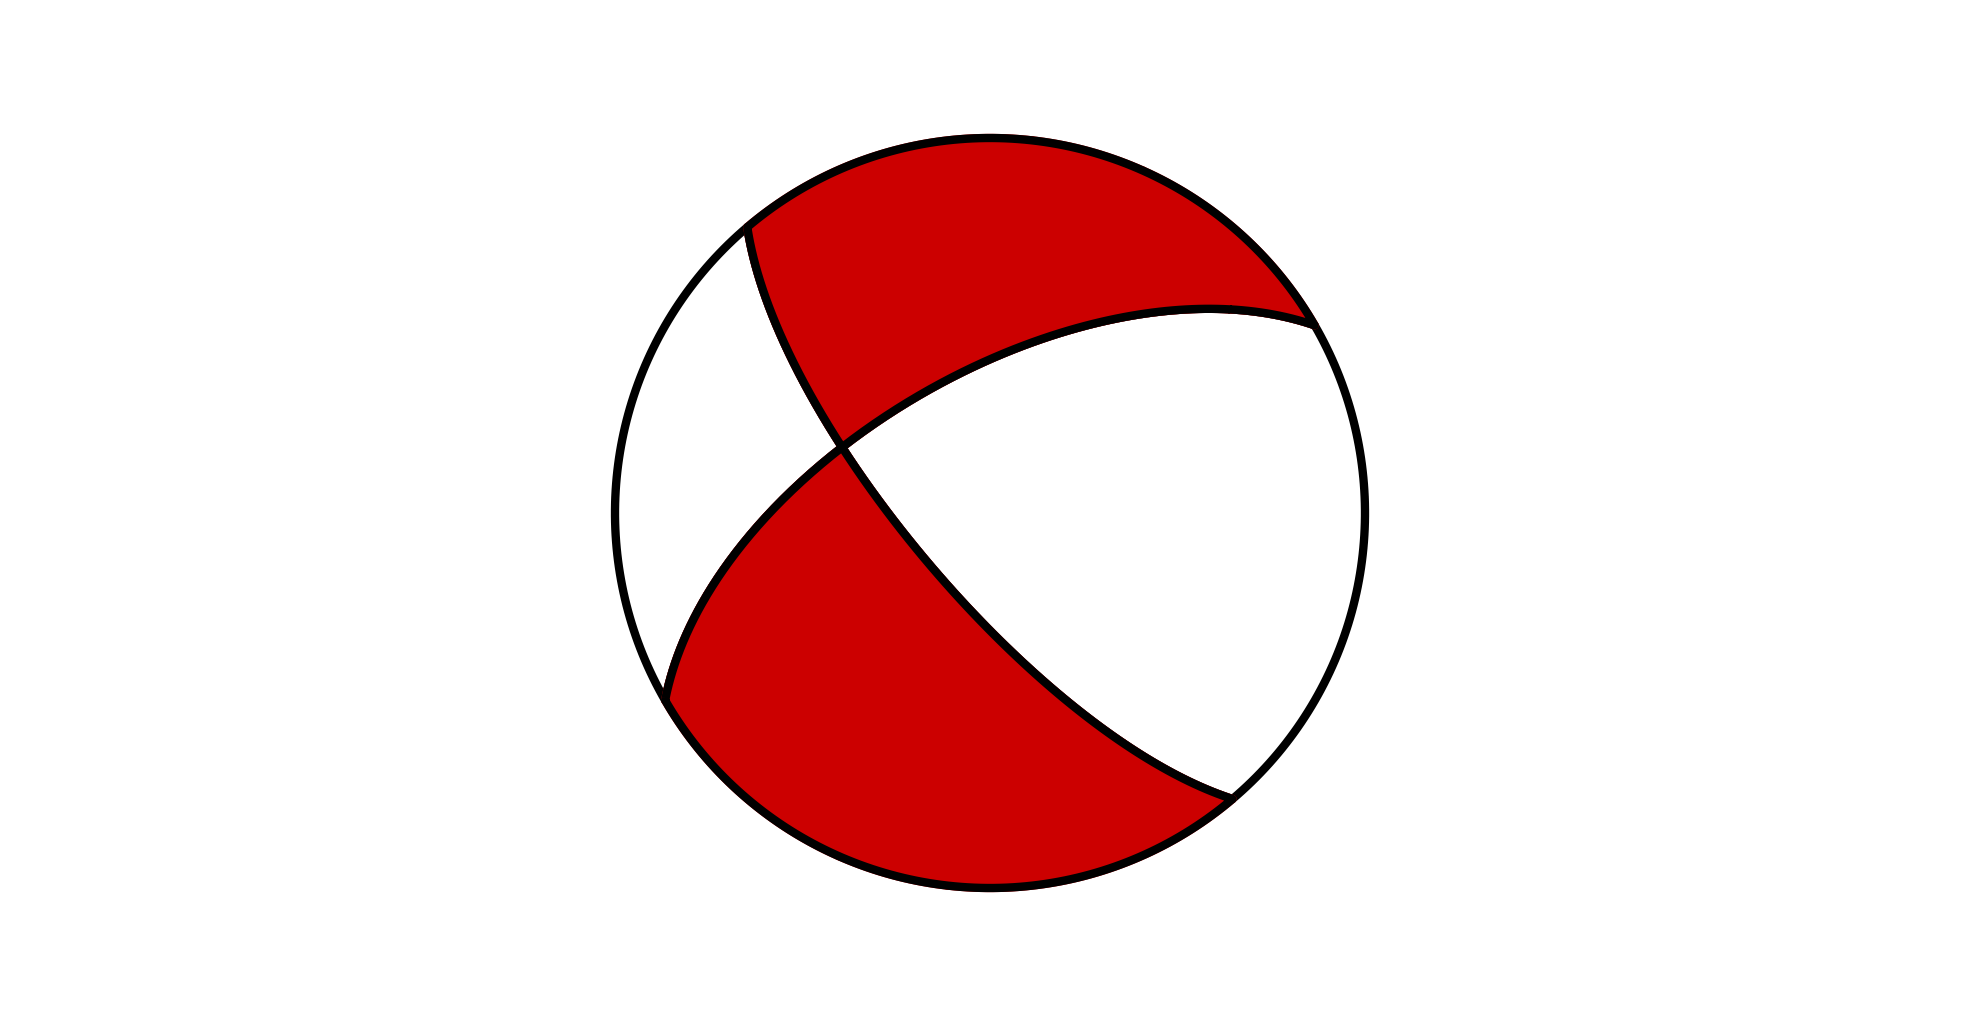

In [53]:
# strike-slip

ss_ex = gf.DCSource(depth=0, strike=240, dip=60., rake=200)

fig,ax = plt.subplots(figsize=(4., 2.), dpi = 600)

ax.set_ylim([-3, 3])
ax.set_xlim([-3, 3])
ax.set_axis_off()

plot.beachball.plot_beachball_mpl(
   ss_ex.pyrocko_moment_tensor(),
    ax,
    beachball_type='full',
    size=90.,
    position=(0, 0),
    color_t=plot.mpl_color('scarletred2'),
    linewidth=1.0)

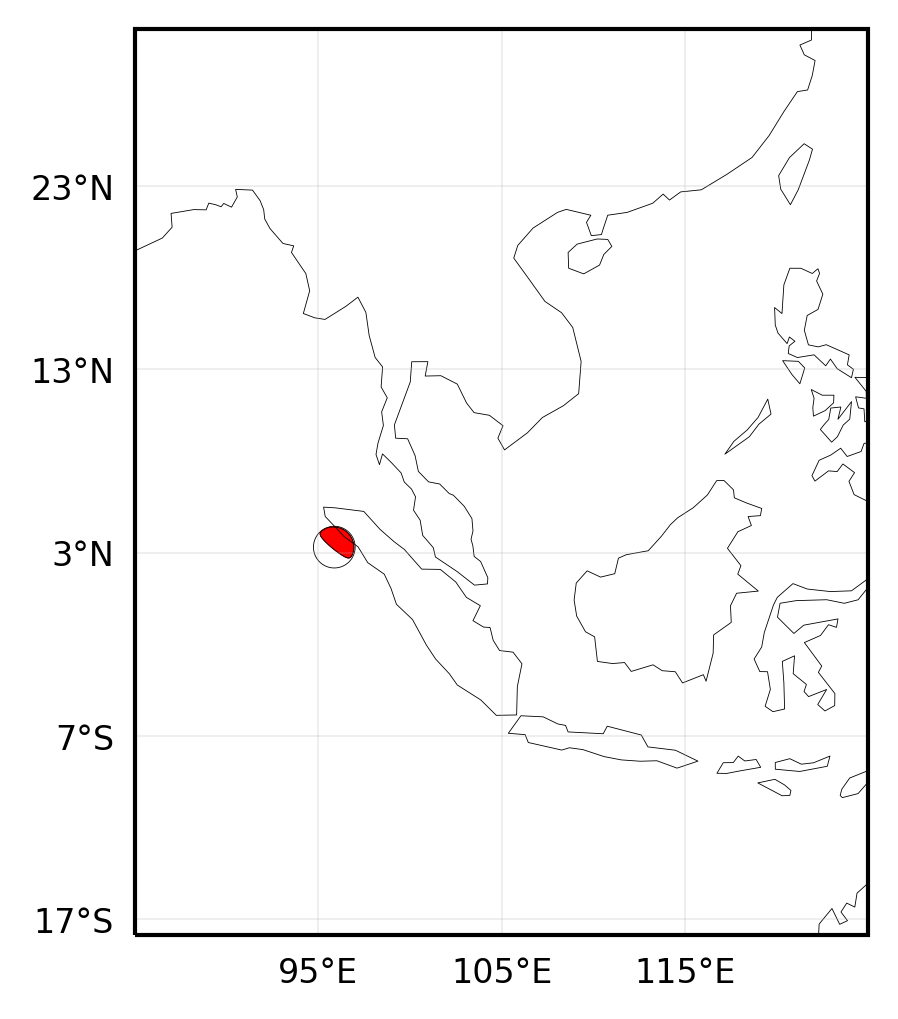

In [44]:
import cartopy 
import cartopy.mpl.geoaxes
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import matplotlib.ticker as mticker

fig, ax = plt.subplots(dpi = 300)
m = plt.axes(projection = cartopy.crs.PlateCarree())

m.set_extent([85, 125, -17, 30])
m.add_feature(cartopy.feature.COASTLINE, linewidth = 0.2)
gl = m.gridlines(linewidth = 0.1, draw_labels = True)
gl.xlocator = mticker.FixedLocator(np.arange(85-10, 125+20, 10))
gl.ylocator = mticker.FixedLocator(np.arange(-17-10, 30+20, 10))
gl.xlabels_top = False
gl.ylabels_right = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.ylabel_style = {'size': 8}
gl.xlabel_style = {'size': 8}

b = beachball.plot_beachball_mpl(test, m, beachball_type='deviatoric', position=(95.876, 3.299), size=10, linewidth=0.2)
